In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from numpy.random import seed
from numpy.random import randint
from math import sqrt
import string
import sys

### Read CSV
##### Input: filename

In [2]:
df = pd.read_csv('../data/adjacency_matrix.csv');
df

,A,B,C,D,E,F,G,H,I,J
A,0,59,48,69,54,91,55,34,81,72
B,59,0,45,19,45,73,48,13,13,42
C,48,45,0,97,11,65,12,58,70,45
D,69,19,97,0,31,94,23,66,71,13
E,54,45,11,31,0,95,37,47,24,49
F,91,73,65,94,95,0,62,35,38,61
G,55,48,12,23,37,62,0,82,96,47
H,34,13,58,66,47,35,82,0,10,47
I,81,13,70,71,24,38,96,10,0,63
J,72,42,45,13,49,61,47,47,63,0


In [3]:
# node names array
namesArr = df.columns.values
print("**** Node names array ****\n",namesArr)

# nodes dictionary
dict = {}
for i in range(0, df.columns.size):
    dict[df.columns[i]] = i;
print("\n**** Nodes dictionary ****")
for x in dict:
  print(x,"-", dict[x])  

# distances matrix
print("\n**** Distances matrix ****")
print('\n'.join(df.to_string(index = False).split('\n')[1:]))

**** Node names array ****
 ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']

**** Nodes dictionary ****
A - 0
B - 1
C - 2
D - 3
E - 4
F - 5
G - 6
H - 7
I - 8
J - 9

**** Distances matrix ****
 0 59 48 69 54 91 55 34 81 72
59  0 45 19 45 73 48 13 13 42
48 45  0 97 11 65 12 58 70 45
69 19 97  0 31 94 23 66 71 13
54 45 11 31  0 95 37 47 24 49
91 73 65 94 95  0 62 35 38 61
55 48 12 23 37 62  0 82 96 47
34 13 58 66 47 35 82  0 10 47
81 13 70 71 24 38 96 10  0 63
72 42 45 13 49 61 47 47 63  0


### Generate n nodes
##### Input: n (number of nodes), lim - space limit

-> n: 20
-> lim: 100

**** Nodes position (x,y) ****
( 37 , 12 )
( 72 , 9 )
( 75 , 5 )
( 79 , 64 )
( 16 , 1 )
( 76 , 71 )
( 6 , 25 )
( 50 , 20 )
( 18 , 84 )
( 11 , 28 )
( 29 , 14 )
( 50 , 68 )
( 87 , 87 )
( 94 , 96 )
( 86 , 13 )
( 9 , 7 )
( 63 , 61 )
( 22 , 57 )
( 1 , 0 )
( 60 , 81 )
MAX:  96

**** Nodes dictionary ****
A - 0
B - 1
C - 2
D - 3
E - 4
F - 5
G - 6
H - 7
I - 8
J - 9
K - 10
L - 11
M - 12
N - 13
O - 14
P - 15
Q - 16
R - 17
S - 18
T - 19

**** Distances matrix ****
  0.0 35.1 38.6  66.8  23.7  70.7  33.6 15.3 74.5  30.5   8.2 57.5  90.1 101.5 49.0  28.4 55.5 47.4  37.9  72.7
 35.1  0.0  5.0  55.4  56.6  62.1  67.9 24.6 92.4  63.9  43.3 63.0  79.4  89.7 14.6  63.0 52.8 69.3  71.6  73.0
 38.6  5.0  0.0  59.1  59.1  66.0  71.8 29.2 97.4  68.0  46.9 67.8  82.9  93.0 13.6  66.0 57.3 74.2  74.2  77.5
 66.8 55.4 59.1   0.0  89.1   7.6  82.8 52.7 64.2  76.9  70.7 29.3  24.4  35.3 51.5  90.3 16.3 57.4 100.9  25.5
 23.7 56.6 59.1  89.1   0.0  92.2  26.0 38.9 83.0  27.5  18.4 75.1 111.5

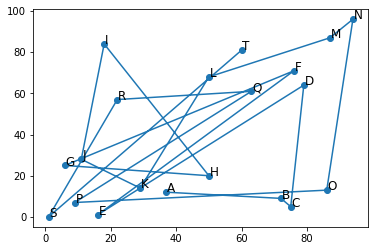

In [13]:
# Nodes position (x,y)
n = int(input("-> n: "))
lim = int(input("-> lim: "))
seed(1)
coord = []
xList = []
yList = []
for i in range(0, n):
    x = randint(0, lim)
    xList.append(x)
    y = randint(0, lim)
    yList.append(y)
    coord.append((x,y))
print("\n**** Nodes position (x,y) ****")
mx = float('-inf')
for x,y in coord:
    if x > mx:
        mx = x
    if y > mx:
        mx = y
    print("(",x,",",y,")")
# Nodes Dictionary
dict = {}
print("\n**** Nodes dictionary ****")
plt.plot(xList,yList,zorder=1) 
plt.scatter(xList,yList,zorder=2)
alphabet_string = string.ascii_uppercase
alphabet_list = list(alphabet_string)
alphabet_list = alphabet_list[:n]
for i, txt in enumerate(alphabet_list):
    dict[txt] = i;
    plt.annotate(txt, (xList[i]+.25, yList[i]), fontsize=12)
for x in dict:
  print(x,"-", dict[x])  

# distance matrix
print("\n**** Distances matrix ****")
# d=√((x_2-x_1)²+(y_2-y_1)²)
tempList = []
for x,y in coord:
    for i,j in coord :
        tempList.append(round(sqrt(pow((x-i),2) + pow((y-j),2) ),1))
mat = []
while tempList != []:
  mat.append(tempList[:n])
  tempList = tempList[n:]
dist_mat = pd.DataFrame(mat)
print('\n'.join(dist_mat.to_string(index = False).split('\n')[1:]))